In [1]:
import numpy as np
from Parser import Parser
import music21
import pypianoroll
import matplotlib.pyplot as plt

In [2]:
files = Parser('lpd',subset=0.001,lazy=False)

Number of files: 115
Loading track 115/115
Loading finished with 5020 samples


In [3]:
# lazy evaluation testing
# only if lazy=True
counter = 0
for i in files.tracks:
    print("Processing: %i"%counter,end='\r')
    counter += 1

In [7]:
files.play(2100)

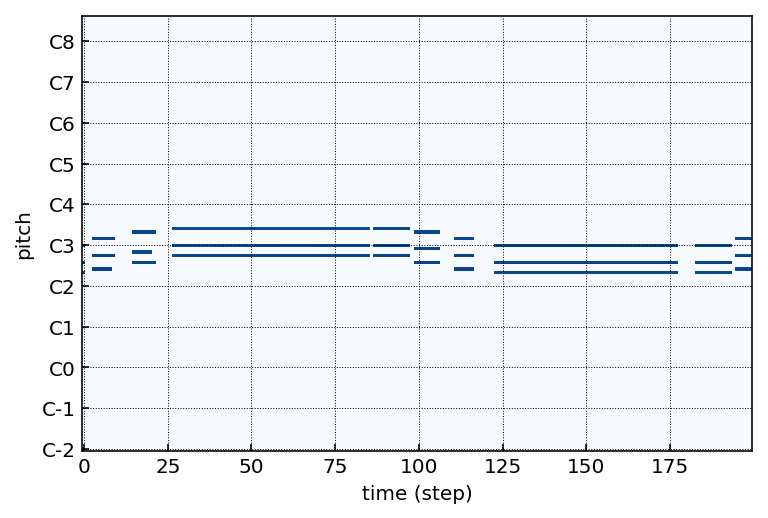

In [8]:
files.plot(2100)